In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import TomekLinks, RandomUnderSampler, EditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek
import category_encoders as ce
import xgboost as xgb
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
raw_data = pd.read_csv('data/365_classification_data.csv')

In [4]:
raw_data.head()

,student_id,student_country,date_registered,mins_watched_after_7_days,mins_watched_after_14_days,num_quizzes_engaged,num_exams_engaged,days_engaged,questions_hub_engaged,quizzes_engaged,exams_engaged,lessons_engaged,paid_student
0,258798,IN,2022-01-01,0.3,0.3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
1,258799,CO,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,258800,CA,2022-01-01,192.2,268.4,10.0,5.0,29.0,0.0,1.0,1.0,1.0,1.0
3,258801,IN,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,258802,US,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for column in raw_data.columns[3:]:
    raw_data[column] = raw_data[column].fillna(0)

In [6]:
raw_data.head()

,student_id,student_country,date_registered,mins_watched_after_7_days,mins_watched_after_14_days,num_quizzes_engaged,num_exams_engaged,days_engaged,questions_hub_engaged,quizzes_engaged,exams_engaged,lessons_engaged,paid_student
0,258798,IN,2022-01-01,0.3,0.3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,258799,CO,2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,258800,CA,2022-01-01,192.2,268.4,10.0,5.0,29.0,0.0,1.0,1.0,1.0,1.0
3,258801,IN,2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,258802,US,2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data = raw_data.copy()
features = data.drop(data.columns[[0, 2, -1]], axis = 1)

In [8]:
features

,student_country,mins_watched_after_7_days,mins_watched_after_14_days,num_quizzes_engaged,num_exams_engaged,days_engaged,questions_hub_engaged,quizzes_engaged,exams_engaged,lessons_engaged
0,IN,0.3,0.3,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,CO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CA,192.2,268.4,10.0,5.0,29.0,0.0,1.0,1.0,1.0
3,IN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
35225,CM,7.8,7.8,1.0,0.0,1.0,0.0,1.0,0.0,1.0
35226,CA,10.4,10.4,1.0,0.0,1.0,0.0,1.0,0.0,1.0
35227,SA,0.1,0.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
35228,NL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
target = data.drop(data.columns[0:-1], axis = 1)

In [10]:
target

,paid_student
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
35225,0.0
35226,0.0
35227,0.0
35228,0.0


In [11]:
features

,student_country,mins_watched_after_7_days,mins_watched_after_14_days,num_quizzes_engaged,num_exams_engaged,days_engaged,questions_hub_engaged,quizzes_engaged,exams_engaged,lessons_engaged
0,IN,0.3,0.3,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,CO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CA,192.2,268.4,10.0,5.0,29.0,0.0,1.0,1.0,1.0
3,IN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
35225,CM,7.8,7.8,1.0,0.0,1.0,0.0,1.0,0.0,1.0
35226,CA,10.4,10.4,1.0,0.0,1.0,0.0,1.0,0.0,1.0
35227,SA,0.1,0.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
35228,NL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
he = ce.HashingEncoder(cols='student_country')
features_hash = he.fit_transform(features)
features_hash

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,mins_watched_after_7_days,mins_watched_after_14_days,num_quizzes_engaged,num_exams_engaged,days_engaged,questions_hub_engaged,quizzes_engaged,exams_engaged,lessons_engaged
0,0,0,0,1,0,0,0,0,0.3,0.3,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,0,0,0,192.2,268.4,10.0,5.0,29.0,0.0,1.0,1.0,1.0
3,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35225,0,0,0,1,0,0,0,0,7.8,7.8,1.0,0.0,1.0,0.0,1.0,0.0,1.0
35226,0,1,0,0,0,0,0,0,10.4,10.4,1.0,0.0,1.0,0.0,1.0,0.0,1.0
35227,0,0,0,0,0,0,0,1,0.1,0.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
35228,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
corr = features_hash.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision = 2)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,mins_watched_after_7_days,mins_watched_after_14_days,num_quizzes_engaged,num_exams_engaged,days_engaged,questions_hub_engaged,quizzes_engaged,exams_engaged,lessons_engaged
col_0,1.00,-0.08,-0.15,-0.25,-0.16,-0.11,-0.09,-0.11,-0.01,-0.01,-0.00,-0.01,-0.00,-0.01,0.00,-0.01,0.00
col_1,-0.08,1.00,-0.09,-0.15,-0.09,-0.07,-0.06,-0.06,0.03,0.03,0.02,0.02,0.02,0.01,0.01,0.02,-0.01
col_2,-0.15,-0.09,1.00,-0.28,-0.18,-0.12,-0.11,-0.12,0.07,0.07,0.07,0.06,0.07,0.03,0.07,0.06,0.02
col_3,-0.25,-0.15,-0.28,1.00,-0.29,-0.20,-0.17,-0.20,-0.03,-0.03,-0.04,-0.03,-0.04,-0.00,-0.04,-0.05,-0.03
col_4,-0.16,-0.09,-0.18,-0.29,1.00,-0.13,-0.11,-0.13,-0.04,-0.04,-0.05,-0.04,-0.05,-0.02,-0.05,-0.03,-0.02
col_5,-0.11,-0.07,-0.12,-0.20,-0.13,1.00,-0.08,-0.09,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.01,0.00
col_6,-0.09,-0.06,-0.11,-0.17,-0.11,-0.08,1.00,-0.07,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.02,0.03
col_7,-0.11,-0.06,-0.12,-0.20,-0.13,-0.09,-0.07,1.00,0.00,0.01,0.02,0.02,0.03,0.00,0.02,0.01,0.02
mins_watched_after_7_days,-0.01,0.03,0.07,-0.03,-0.04,-0.00,-0.00,0.00,1.00,0.92,0.49,0.50,0.48,0.21,0.39,0.49,0.26
mins_watched_after_14_days,-0.01,0.03,0.07,-0.03,-0.04,-0.00,0.00,0.01,0.92,1.00,0.56,0.60,0.56,0.26,0.38,0.49,0.23


In [14]:
features_hash = features_hash.drop(columns = ['num_quizzes_engaged', 'num_exams_engaged'])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features_hash, target , test_size = 0.2, random_state=42)

In [16]:
sm = SMOTE(k_neighbors = 5)
enn = EditedNearestNeighbours(n_neighbors = 5)
sm = SMOTEENN(sampling_strategy = 'minority', smote = sm, enn = enn)
X_train_up, y_train_up = sm.fit_resample(X_train, y_train)

In [26]:
# columns_to_scale = ['mins_watched_after_7_days', 'mins_watched_after_14_days', 'days_engaged',
#                     'questions_hub_engaged', 'quizzes_engaged', 'exams_engaged', 'lessons_engaged']
# scaler = MinMaxScaler()
# scaler.fit(X_train_up[columns_to_scale])
# X_train_up[columns_to_scale] = scaler.transform(X_train_up[columns_to_scale])
# X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      6638
         1.0       0.80      0.69      0.74       408

    accuracy                           0.97      7046
   macro avg       0.89      0.84      0.86      7046
weighted avg       0.97      0.97      0.97      7046



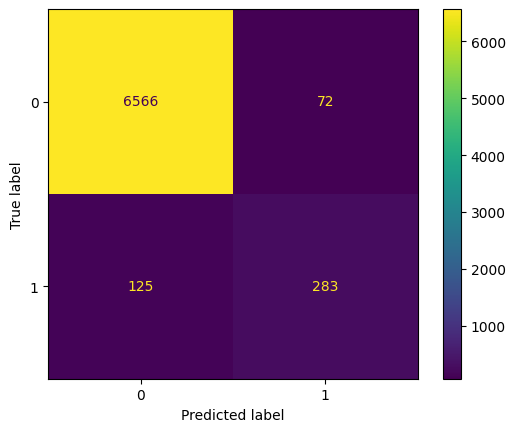

In [17]:
model_xgb = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_xgb.fit(X_train_up, y_train_up)# In[ ]:
y_pred = model_xgb.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

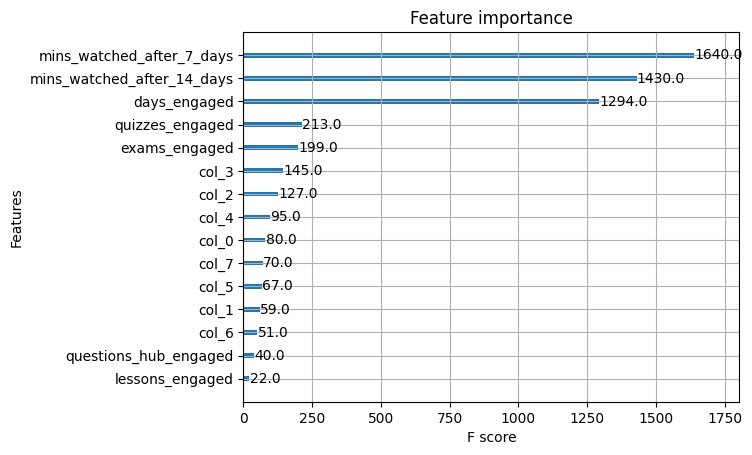

In [24]:
plot_importance(model_xgb)
plt.show()

In [22]:
parameters = {
    'max_depth': list(range(2, 10)),
    'max_depth': [3,6,10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000]
}

clf = GridSearchCV(estimator=model_xgb, 
                   param_grid=parameters,
                   scoring='f1', 
                   verbose=1,
                   n_jobs=-1)

clf.fit(X_train_up, y_train_up)

print('Best score: %0.3f' % clf.best_score_)
print('Best parameters set:')
best_parameters = clf.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))
plot_confusion_matrix(clf, X_test, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      6638
         1.0       0.77      0.70      0.73       408

    accuracy                           0.97      7046
   macro avg       0.88      0.84      0.86      7046
weighted avg       0.97      0.97      0.97      7046



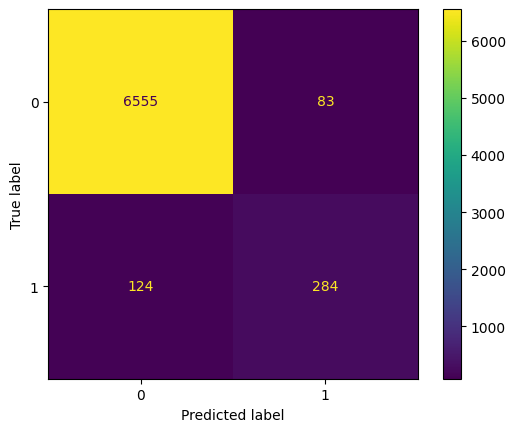

In [25]:
model_rfc = RandomForestClassifier(random_state=42, n_estimators = 200)
model_rfc.fit(X_train_up, y_train_up.values.ravel())
y_pred = model_rfc.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [28]:
model_rfc.feature_importances_

array([0.01536527, 0.00506144, 0.00654488, 0.02114213, 0.01897031,
       0.00780203, 0.00748362, 0.00640906, 0.07175803, 0.11100598,
       0.35534477, 0.00745759, 0.16323487, 0.17221973, 0.0302003 ])

<Axes: >

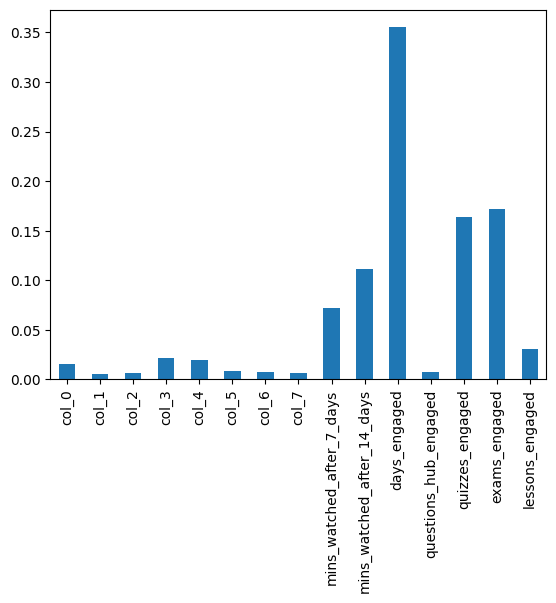

In [29]:
forest_importances = pd.Series(model_rfc.feature_importances_, 
                               index=X_train_up.columns)
forest_importances.plot.bar()

In [21]:
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }

# clf = GridSearchCV(estimator=model_rfc, 
#                    param_grid=param_grid,
#                    scoring='f1', 
#                    verbose=1,
#                    n_jobs=-1)

# clf.fit(X_train_up, y_train_up)

# print('Best score: %0.3f' % clf.best_score_)
# print('Best parameters set:')
# best_parameters = clf.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#     print('\t%s: %r' % (param_name, best_parameters[param_name]))
# predictions = clf.predict(X_test)
# print(classification_report(y_test, predictions))
# plot_confusion_matrix(clf, X_test, y_test)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      6638
         1.0       0.75      0.75      0.75       408

    accuracy                           0.97      7046
   macro avg       0.87      0.87      0.87      7046
weighted avg       0.97      0.97      0.97      7046



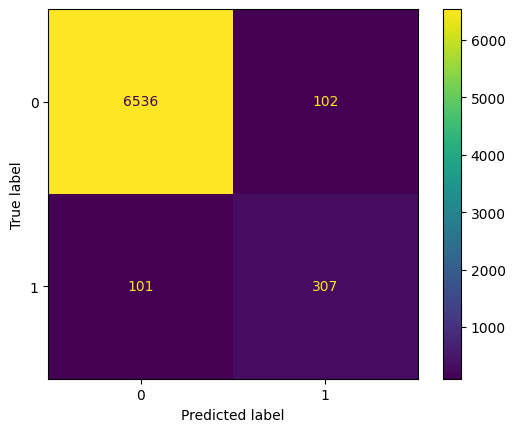

In [31]:
model_gbc = GradientBoostingClassifier(random_state=42, n_estimators = 200)
model_gbc.fit(X_train_up, y_train_up.values.ravel())# In[ ]:
y_pred = model_gbc.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

<Axes: >

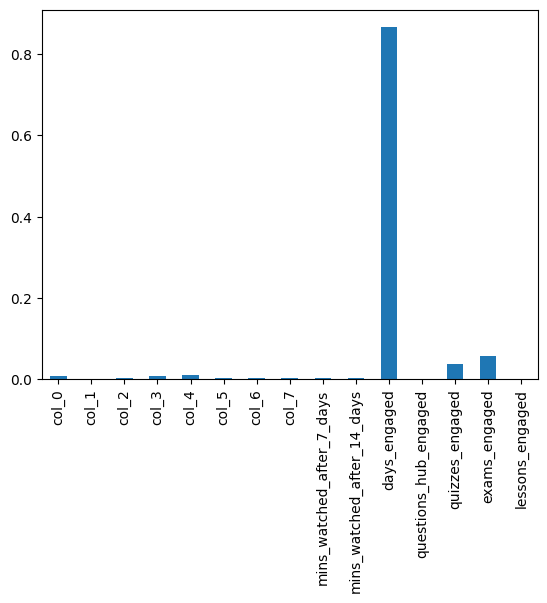

In [32]:
forest_importances = pd.Series(model_gbc.feature_importances_, 
                               index=X_train_up.columns)
forest_importances.plot.bar()

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.934 total time=   9.3s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.956 total time=   8.9s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.955 total time=   9.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.951 total time=   8.9s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.953 total time=   9.2s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.943 total time=  20.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.964 total time=  19.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.962 total time=  18.8s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.959 total time=  18.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.959

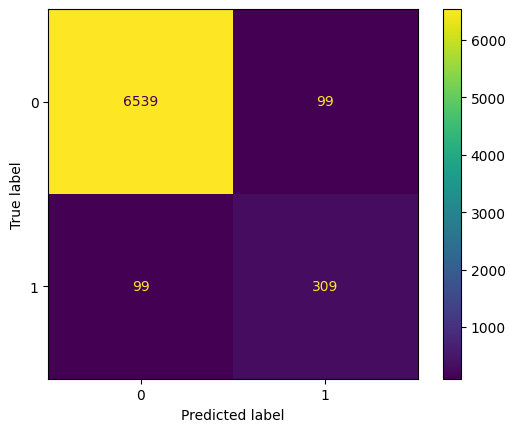

In [38]:
parameters = {
    'max_depth': [3],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200, 400]
}

clf = GridSearchCV(estimator=model_gbc, 
                   param_grid=parameters,
                   scoring='f1', 
                   verbose=5)

clf.fit(X_train_up, y_train_up.values.ravel())

print('Best score: %0.3f' % clf.best_score_)
print('Best parameters set:')
best_parameters = clf.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [40]:
clf.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, n_estimators=400,
                           random_state=42)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      6638
         1.0       0.75      0.75      0.75       408

    accuracy                           0.97      7046
   macro avg       0.87      0.87      0.87      7046
weighted avg       0.97      0.97      0.97      7046



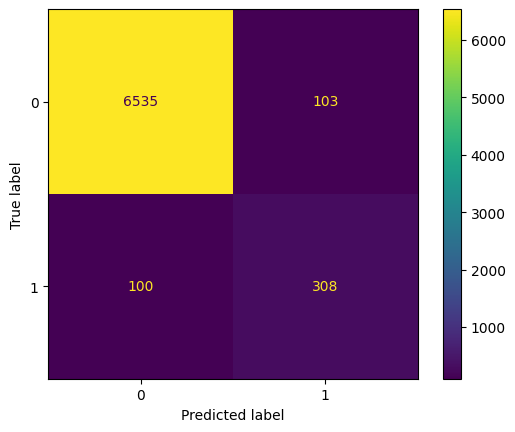

In [42]:
clf.best_estimator_.fit(X_train_up, y_train_up.values.ravel())
y_pred = clf.best_estimator_.predict(X_test)
print(classification_report(y_test, predictions))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [47]:
clf.best_estimator_.fit(features_hash, target.values.ravel())# In[ ]:
y_pred = clf.best_estimator_.predict(features_hash)
y_pred_proba = clf.best_estimator_.predict_proba(features_hash)
y_pred.shape
y_pred_proba.shape

(35230, 2)

In [53]:
data = data.assign(predictions = y_pred)

In [56]:
data = data.assign(convert_proba = y_pred_proba[:, 1])

In [57]:
data

,student_id,student_country,date_registered,mins_watched_after_7_days,mins_watched_after_14_days,num_quizzes_engaged,num_exams_engaged,days_engaged,questions_hub_engaged,quizzes_engaged,exams_engaged,lessons_engaged,paid_student,predictions,convert_proba
0,258798,IN,2022-01-01,0.3,0.3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.002922
1,258799,CO,2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003107
2,258800,CA,2022-01-01,192.2,268.4,10.0,5.0,29.0,0.0,1.0,1.0,1.0,1.0,1.0,0.981957
3,258801,IN,2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003398
4,258802,US,2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35225,295511,CM,2022-10-20,7.8,7.8,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.006302
35226,295512,CA,2022-10-20,10.4,10.4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.010750
35227,295513,SA,2022-10-20,0.1,0.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.004877
35228,295514,NL,2022-10-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005219


In [59]:
final_pred = data.drop(columns = ['paid_student', 'predictions'])

In [60]:
final_pred

,student_id,student_country,date_registered,mins_watched_after_7_days,mins_watched_after_14_days,num_quizzes_engaged,num_exams_engaged,days_engaged,questions_hub_engaged,quizzes_engaged,exams_engaged,lessons_engaged,convert_proba
0,258798,IN,2022-01-01,0.3,0.3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.002922
1,258799,CO,2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003107
2,258800,CA,2022-01-01,192.2,268.4,10.0,5.0,29.0,0.0,1.0,1.0,1.0,0.981957
3,258801,IN,2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003398
4,258802,US,2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026422
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35225,295511,CM,2022-10-20,7.8,7.8,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.006302
35226,295512,CA,2022-10-20,10.4,10.4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.010750
35227,295513,SA,2022-10-20,0.1,0.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.004877
35228,295514,NL,2022-10-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005219


In [61]:
final_pred.to_csv('final_prediction_data.csv')